# Final Project

In [75]:
#Felipe Restrepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#Car Crash dataset for Tempe (2012-2024) from the Tempe open data portal
crash = pd.read_csv('1.08_Crash_Data_Report_(detail).csv')

### Table of Contents

[Preview Original Data](#POD)
</br>
[Research Questions](#RQ)
</br>
[Q1](#Q1)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Get](#Q1G)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Clean](#Q1C)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Prepare](#Q1P)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Analyze](#Q1A)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Vizualize](#Q1V)
</br>
[Q2](#Q2)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Get](#Q2G)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Clean](#Q2C)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Prepare](#Q2P)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Analyze](#Q2A)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Vizualize](#Q2V)
</br>
[Q3](#Q3)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Get](#Q3G)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Clean](#Q3C)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Prepare](#Q3P)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Analyze](#Q3A)
</br> &nbsp;&nbsp;&nbsp;&nbsp;[Vizualize](#Q3V)
</br>
[Questions and Insights](#QI)
</br>
[Sources](#S)

## Preview Original Data <a id='POD'></a>

In [77]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):display(crash)

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.952210,33.421910,1,2598369.0,2012/01/01 07:25:00+00,2012.0,University Dr,Hardy Dr,0.00,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.421910,-111.952210
1,-111.937690,33.423190,2,2593420.0,2012/01/01 11:45:00+00,2012.0,7th St,Myrtle Ave,139.92,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.423190,-111.937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51303,-111.926404,33.435576,51304,4155885.0,2024/03/14 13:20:00+00,2024.0,SR-202 Exit 7 T-Ramp,NaN,0.00,Entrance Exit Ramp 205,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,Driver,40.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.435576,-111.926404
51304,-111.909869,33.436621,51305,4155890.0,2024/03/15 07:11:00+00,2024.0,SR-202 Exit 8 J-Ramp,NaN,0.00,Entrance Exit Ramp 205,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,26.0,Male,North,Making Left Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.436621,-111.909869


In [78]:
crash.nunique()

X                      15170
Y                      15624
OBJECTID               51305
Incidentid             51304
DateTime               50842
Year                      13
StreetName               525
CrossStreet              708
Distance                3062
JunctionRelation          35
Totalinjuries             10
Totalfatalities            4
Injuryseverity             7
Collisionmanner           14
Lightcondition             8
Weather                    9
SurfaceCondition           9
Unittype_One               4
Age_Drv1                 111
Gender_Drv1                3
Traveldirection_One       10
Unitaction_One            23
Violation1_Drv1           28
AlcoholUse_Drv1            2
DrugUse_Drv1               2
Unittype_Two               4
Age_Drv2                 107
Gender_Drv2                3
Traveldirection_Two       10
Unitaction_Two            24
Violation1_Drv2           23
AlcoholUse_Drv2            2
DrugUse_Drv2               2
Latitude               15690
Longitude     

In [79]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51305 entries, 0 to 51304
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51162 non-null  float64
 1   Y                    51162 non-null  float64
 2   OBJECTID             51305 non-null  int64  
 3   Incidentid           51304 non-null  float64
 4   DateTime             51304 non-null  object 
 5   Year                 51304 non-null  float64
 6   StreetName           51282 non-null  object 
 7   CrossStreet          50817 non-null  object 
 8   Distance             51303 non-null  float64
 9   JunctionRelation     51303 non-null  object 
 10  Totalinjuries        51303 non-null  float64
 11  Totalfatalities      51303 non-null  float64
 12  Injuryseverity       51303 non-null  object 
 13  Collisionmanner      51303 non-null  object 
 14  Lightcondition       51303 non-null  object 
 15  Weather              51303 non-null 

In [80]:
crash['Year'].unique()

array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022., 2023.,   nan, 2024.])

## RESEARCH QUESTIONS <a id='RQ'></a>

Q1. Do men or women cause the most car crashes? Who is involved in the most amount of crashes and who is usually at fault?
</br>Q2. What factors play the largest role in whether a car crash is fatal or not?
</br>Q3. Within Tempe, Has the ratio of car crashes in relation to population changed between 2012 and 2023?

## Q1. Do men or Women cause the most car crashes? <a id="Q1"></a>

### Get <a id="Q1G"></a>

In [81]:
crash = pd.read_csv('1.08_Crash_Data_Report_(detail).csv')

### Clean <a id="Q1C"></a>

In [82]:
#code for if I wanted to rename column names, not worth it though, less helpful than helpful. 

# crash.rename(columns={'Totalinjuries':'TotalInjuries', 'Totalfatalities':'TotalFatalities', 'Injuryseverity':'InjurySeverity', 'Collisionmanner': 'CollisionManner', 'Lightcondition':'LightCondition'}, inplace=True)
# with pd.option_context('display.max_rows', 5, 'display.max_columns', None):display(crash) #verify rename method worked

In [83]:
crash.isnull().sum()

X                       143
Y                       143
OBJECTID                  0
Incidentid                1
DateTime                  1
Year                      1
StreetName               23
CrossStreet             488
Distance                  2
JunctionRelation          2
Totalinjuries             2
Totalfatalities           2
Injuryseverity            2
Collisionmanner           2
Lightcondition            2
Weather                   2
SurfaceCondition          2
Unittype_One              2
Age_Drv1                 49
Gender_Drv1             930
Traveldirection_One       2
Unitaction_One            2
Violation1_Drv1          49
AlcoholUse_Drv1          49
DrugUse_Drv1             49
Unittype_Two           3389
Age_Drv2               4758
Gender_Drv2            4858
Traveldirection_Two    3389
Unitaction_Two         3389
Violation1_Drv2        4758
AlcoholUse_Drv2        4758
DrugUse_Drv2           4758
Latitude                143
Longitude               143
dtype: int64

In [84]:
crash.isna().sum()
#Noticed that there was one record with a null value for Incidentid

X                       143
Y                       143
OBJECTID                  0
Incidentid                1
DateTime                  1
Year                      1
StreetName               23
CrossStreet             488
Distance                  2
JunctionRelation          2
Totalinjuries             2
Totalfatalities           2
Injuryseverity            2
Collisionmanner           2
Lightcondition            2
Weather                   2
SurfaceCondition          2
Unittype_One              2
Age_Drv1                 49
Gender_Drv1             930
Traveldirection_One       2
Unitaction_One            2
Violation1_Drv1          49
AlcoholUse_Drv1          49
DrugUse_Drv1             49
Unittype_Two           3389
Age_Drv2               4758
Gender_Drv2            4858
Traveldirection_Two    3389
Unitaction_Two         3389
Violation1_Drv2        4758
AlcoholUse_Drv2        4758
DrugUse_Drv2           4758
Latitude                143
Longitude               143
dtype: int64

In [85]:
#figured out index of the record with a NaN Incidentid, turns out every value within that one record is NaN
crash[crash['Incidentid'].isna()]
#drops the single row full of NaN values
crash.drop(48830, inplace=True)
#verify that NaN row has been dropped
crash.isna().sum()['Incidentid']

np.int64(0)

### Prepare <a id="Q1P"></a>

Will create 'GenderDF' dataframe containing long data of every driver involved in an accident along with their gender and violation,
to do this I will:
1. Create new df with only 'OBJECTID', 'Gender_Drv1', 'Violation1_Drv1', 'Gender_Drv2', 'Violation1_Drv2'
2. Melt the two Gender_Drv columns into 'Drv' as the new variable column containing either Gender_Drv1 or Gender_Drv2 prior column names as the values,
and then 'Gender' as the name for the value column. 

3. Rename the values in the Drv column to 1 or 2

4. create a new 'violation' column, do an if lamba statement that looks at whether the value is 1 or 2, 
if 1 use value in original Violation1_Drv1 column for new 'violation' column
if 2 use value in original Violation2_Drv2 column for new 'violation' column

In [86]:
#1 Create new df with only 'OBJECTID', 'Gender_Drv1', 'Violation1_Drv1', 'Gender_Drv2', 'Violation1_Drv2'
GenderDF = crash[['OBJECTID', 'Gender_Drv1', 'Violation1_Drv1', 'Gender_Drv2', 'Violation1_Drv2']]
GenderDF

,OBJECTID,Gender_Drv1,Violation1_Drv1,Gender_Drv2,Violation1_Drv2
0,1,Female,Inattention Distraction,Female,No Improper Action
1,2,NaN,Unknown,NaN,NaN
2,3,Male,Made Improper Turn,Male,No Improper Action
3,4,NaN,Unknown,NaN,NaN
4,5,Male,Unsafe Lane Change,Female,No Improper Action
...,...,...,...,...,...
51300,51301,Male,Speed To Fast For Conditions,NaN,NaN
51301,51302,Male,Failed To Yield Right Of Way,Female,Unsafe Lane Change
51302,51303,Male,Speed To Fast For Conditions,Female,No Improper Action
51303,51304,Male,Followed Too Closely,Female,No Improper Action


In [87]:
#2 Melt the two Gender_Drv columns into 'Drv' as the new variable column containing either Gender_Drv1 or Gender_Drv2 column names 
#as the values, and then 'Gender' as the name for the value column.
GenderDF = GenderDF.melt(id_vars=['OBJECTID','Violation1_Drv1','Violation1_Drv2'], var_name='Drv', value_name='Gender')
GenderDF

,OBJECTID,Violation1_Drv1,Violation1_Drv2,Drv,Gender
0,1,Inattention Distraction,No Improper Action,Gender_Drv1,Female
1,2,Unknown,NaN,Gender_Drv1,NaN
2,3,Made Improper Turn,No Improper Action,Gender_Drv1,Male
3,4,Unknown,NaN,Gender_Drv1,NaN
4,5,Unsafe Lane Change,No Improper Action,Gender_Drv1,Male
...,...,...,...,...,...
102603,51301,Speed To Fast For Conditions,NaN,Gender_Drv2,NaN
102604,51302,Failed To Yield Right Of Way,Unsafe Lane Change,Gender_Drv2,Female
102605,51303,Speed To Fast For Conditions,No Improper Action,Gender_Drv2,Female
102606,51304,Followed Too Closely,No Improper Action,Gender_Drv2,Female


In [88]:
#3 Rename the values in the Drv column to 1 or 2
GenderDF['Drv'] = GenderDF['Drv'].replace({'Gender_Drv1': '1', 'Gender_Drv2': '2'})
GenderDF['Drv'] = GenderDF['Drv'].astype(int) #converts '1' string to integer
GenderDF

,OBJECTID,Violation1_Drv1,Violation1_Drv2,Drv,Gender
0,1,Inattention Distraction,No Improper Action,1,Female
1,2,Unknown,NaN,1,NaN
2,3,Made Improper Turn,No Improper Action,1,Male
3,4,Unknown,NaN,1,NaN
4,5,Unsafe Lane Change,No Improper Action,1,Male
...,...,...,...,...,...
102603,51301,Speed To Fast For Conditions,NaN,2,NaN
102604,51302,Failed To Yield Right Of Way,Unsafe Lane Change,2,Female
102605,51303,Speed To Fast For Conditions,No Improper Action,2,Female
102606,51304,Followed Too Closely,No Improper Action,2,Female


In [89]:
#check to make sure Drv is an integer
GenderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102608 entries, 0 to 102607
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   OBJECTID         102608 non-null  int64 
 1   Violation1_Drv1  102512 non-null  object
 2   Violation1_Drv2  93094 non-null   object
 3   Drv              102608 non-null  int64 
 4   Gender           96822 non-null   object
dtypes: int64(2), object(3)
memory usage: 3.9+ MB


In [90]:
#4 create a new 'violation' column, do an if lamba statement that looks at whether the Drv value is 1 or 2, if 1 use value in original Violation1_Drv1 column for new 'violation' column if 2 use value in 
# original Violation2_Drv2 column for new 'violation' column
GenderDF['violation'] = GenderDF.apply(lambda x: x.Violation1_Drv1 if x.Drv == 1 else x.Violation1_Drv2, axis=1)
GenderDF.drop(columns=['Violation1_Drv1', 'Violation1_Drv2'], inplace=True)
GenderDF #New Long format

,OBJECTID,Drv,Gender,violation
0,1,1,Female,Inattention Distraction
1,2,1,NaN,Unknown
2,3,1,Male,Made Improper Turn
3,4,1,NaN,Unknown
4,5,1,Male,Unsafe Lane Change
...,...,...,...,...
102603,51301,2,NaN,NaN
102604,51302,2,Female,Unsafe Lane Change
102605,51303,2,Female,No Improper Action
102606,51304,2,Female,No Improper Action


This is the new Long format df that has separated the second driver along with their gender and violation as their own isolated traffic incident.
though both drivers contain different index, they both contain the same OBJECTID meaning a query by OBJECTID will give you the same 
information on both drivers in the single incident but original will give it to you with 1 record, and Long will give it to you in 2 records'

This is useful in trying to determine fault, and in the following example determining which gender was at fault.
This allows me to query only the one 'violation' column for "No Improper Action". 
I am now assuming that those counted in the No Improper Action are innocent and will be excluding them from the total count of that 
Gender's, at fault crash count. If the original incident was a Male that made an unsafe lane change and the Female's violation was 
No Improper Action taken, the Female would be excluded from the total female at fault crash count, while the male's would still be 
included. If 2 males made an unsafe lane change within the same incident, it would be counted as 2 separate crashes. 

The following analyses will now count number of faults that led to a crash per gender, rather than the total crashes per gender.

### Analyze <a id="Q1A"></a>

In [91]:
#using new GenderDF
GenderDF['Gender'].value_counts()

Gender
Male       52975
Female     38951
Unknown     4896
Name: count, dtype: int64

In [92]:
#number of males involved in a crash, as Drv1 (Original DF Used for verification)
crash['Gender_Drv1'].value_counts()

Gender_Drv1
Male       27168
Female     18753
Unknown     4454
Name: count, dtype: int64

In [93]:
#number of males involved in a crash, as Drv2 (Original DF Used for verification)
crash['Gender_Drv2'].value_counts()

Gender_Drv2
Male       25807
Female     20198
Unknown      442
Name: count, dtype: int64

by adding up the Males as Drv1 + Drv2 in the original df, we can verify that the number of total males is in fact 52,975 as new GenderDF above tells us.
<br>**52,975 Males** where involved in a car crash
</br>**38,951 Females** where involved in a car crash
</br>So are men just unluckily getting hit by women at fault? Just kidding!
</br>for the following analysis I will first be removing all records where violation is either NaN or Unknown, I will then be using the violation column to determine whether a driver was a fault, by declaring them at fault if the violation was anything but 'No Improper Action', 

In [94]:
#cleaning NaN + Unknown
GenderDFClean = GenderDF.dropna(subset=['violation'])
GenderDFClean = GenderDF.query('violation != "Unknown"')
GenderDFClean

,OBJECTID,Drv,Gender,violation
0,1,1,Female,Inattention Distraction
2,3,1,Male,Made Improper Turn
4,5,1,Male,Unsafe Lane Change
6,7,1,Female,Other
7,8,1,Male,Speed To Fast For Conditions
...,...,...,...,...
102603,51301,2,NaN,NaN
102604,51302,2,Female,Unsafe Lane Change
102605,51303,2,Female,No Improper Action
102606,51304,2,Female,No Improper Action


In [95]:
GenderDFClean.query('violation != "No Improper Action"')['Gender'].value_counts()

Gender
Male       25818
Female     17881
Unknown     3452
Name: count, dtype: int64

In [96]:
# disregard, used to double check value count statement above
# GenderDFClean.query('violation != "No Improper Action" and Gender == "Male"')

In [97]:
# disregard, used to double check value count statement above
# GenderDFClean.query('violation != "No Improper Action" and Gender == "Female"')

The results show that 
</br>**25,818 Males** where involved in a car accident due to some sort of traffice violation on their part
</br>**17,881 Females** where involved in a car accident due to some sort of traffice violation on their part

### Vizualize <a id="Q1V"></a>

In [98]:
GenderDF['Gender'].value_counts()

Gender
Male       52975
Female     38951
Unknown     4896
Name: count, dtype: int64

In [99]:
GenderCount = GenderDF['Gender'].value_counts().reset_index()
GenderCount

,Gender,count
0,Male,52975
1,Female,38951
2,Unknown,4896


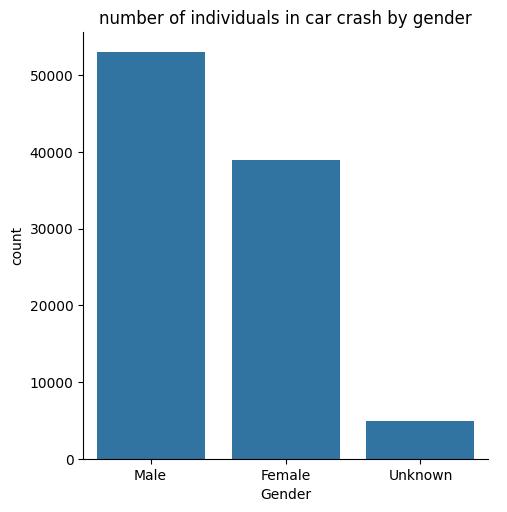

In [100]:
g = sns.catplot(data=GenderCount, kind='bar', x='Gender', y='count')
# g.axes.flat[0].set_title('number of individuals in car crash by gender')
plt.title('number of individuals in car crash by gender')
plt.show()

In [101]:
GenderCountAtFault = GenderDFClean.query('violation != "No Improper Action"')['Gender'].value_counts().reset_index()
GenderCountAtFault

,Gender,count
0,Male,25818
1,Female,17881
2,Unknown,3452


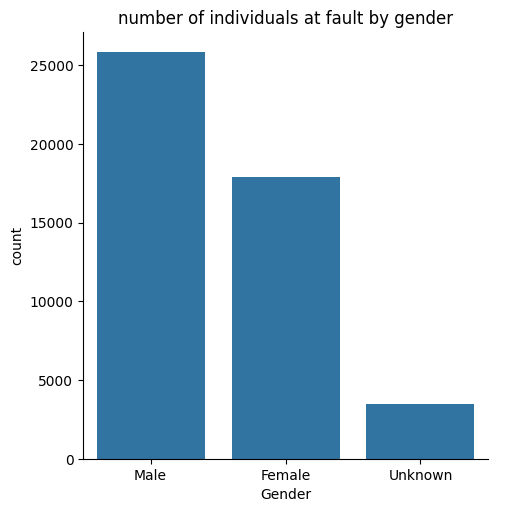

In [102]:
g = sns.catplot(data=GenderCountAtFault, kind='bar', x='Gender', y='count')
# g.axes.flat[0].set_title('number of individuals in car crash by gender')
plt.title('number of individuals at fault by gender')
plt.show()

## Q2. What factors play the largest role in whether a car crash is Fatal or not? <a id='Q2'></a>

### Get <a id="Q2G"></a>

In [103]:
crash = pd.read_csv('1.08_Crash_Data_Report_(detail).csv')

### Clean <a id="Q2C"></a>

In [104]:
crash.drop(48830, inplace=True)
#verify that NaN row has been dropped
crash.isna().sum()['Incidentid']

np.int64(0)

### Prepare <a id="Q2P"></a>

#### FaAlcohol

In [105]:
#1 Create new df with only 'OBJECTID', 'AlcoholUse_Drv1', 'AlcoholUse_Drv2', 'Totalfatalities'
FaAlcoholUse = crash[['Totalfatalities', 'AlcoholUse_Drv1', 'AlcoholUse_Drv2']]
FaAlcoholUse

,Totalfatalities,AlcoholUse_Drv1,AlcoholUse_Drv2
0,0.0,Alcohol,No Apparent Influence
1,0.0,No Apparent Influence,NaN
2,0.0,No Apparent Influence,No Apparent Influence
3,0.0,No Apparent Influence,NaN
4,0.0,No Apparent Influence,No Apparent Influence
...,...,...,...
51300,0.0,Alcohol,NaN
51301,0.0,No Apparent Influence,No Apparent Influence
51302,0.0,No Apparent Influence,No Apparent Influence
51303,0.0,No Apparent Influence,No Apparent Influence


In [106]:
#2 Melt the two AlcoholUSe_Drv columns into 'Drv' as the new variable column containing either Gender_Drv1/2 column names as the values, and then 'Gender' as the value column name.
FaAlcoholUse = FaAlcoholUse.melt(id_vars=['Totalfatalities'], var_name='Drv', value_name='AlcoholUse')
FaAlcoholUse

,Totalfatalities,Drv,AlcoholUse
0,0.0,AlcoholUse_Drv1,Alcohol
1,0.0,AlcoholUse_Drv1,No Apparent Influence
2,0.0,AlcoholUse_Drv1,No Apparent Influence
3,0.0,AlcoholUse_Drv1,No Apparent Influence
4,0.0,AlcoholUse_Drv1,No Apparent Influence
...,...,...,...
102603,0.0,AlcoholUse_Drv2,NaN
102604,0.0,AlcoholUse_Drv2,No Apparent Influence
102605,0.0,AlcoholUse_Drv2,No Apparent Influence
102606,0.0,AlcoholUse_Drv2,No Apparent Influence


In [107]:
FaAlcoholUse.groupby('AlcoholUse').sum('Totalfatalities').sort_values('Totalfatalities', ascending=False).head(10)

,Totalfatalities
AlcoholUse,
No Apparent Influence,230.0
Alcohol,58.0


#### FaCollision

In [108]:
FaCollisionmanner = crash[['Totalfatalities', 'Collisionmanner']]
FaCollisionmanner.groupby('Collisionmanner').sum('Totalfatalities').sort_values('Totalfatalities', ascending=False).head(10)

,Totalfatalities
Collisionmanner,
Other,71.0
Single Vehicle,32.0
Left Turn,25.0
ANGLE (Front To Side)(Other Than Left Turn),11.0
Angle - Other Than Left Turn 2,7.0
Rear End,6.0
Head On,5.0
Sideswipe Same Direction,2.0
Unknown,2.0


#### FaLight

In [109]:
FaLightcondition = crash[['Totalfatalities', 'Lightcondition']]
FaLightcondition

,Totalfatalities,Lightcondition
0,0.0,Dark Lighted
1,0.0,Dark Lighted
2,0.0,Daylight
3,0.0,Daylight
4,0.0,Dusk
...,...,...
51300,0.0,Dark Lighted
51301,0.0,Daylight
51302,0.0,Daylight
51303,0.0,Daylight


In [110]:
FaLightPercent = FaLightcondition.groupby('Lightcondition').agg(
    Totalfatalities=('Totalfatalities', 'sum'),
    Totalrecords=('Totalfatalities', 'count')
).sort_values('Totalfatalities', ascending=False)

FaLightPercent['percent'] = FaLightPercent['Totalfatalities'] / FaLightPercent['Totalrecords'] * 100
FaLightPercent



,Totalfatalities,Totalrecords,percent
Lightcondition,,,
Dark Lighted,72.0,11903,0.604890
Daylight,67.0,36201,0.185078
Unknown 51,14.0,417,3.357314
Dark Unknown Lighting,4.0,259,1.544402
Dusk,2.0,1618,0.123609
Dark Not Lighted,1.0,385,0.259740
Dawn,1.0,463,0.215983
51,0.0,57,0.000000


In [111]:
FaLightcondition['Lightcondition'].value_counts()

Lightcondition
Daylight                 36201
Dark Lighted             11903
Dusk                      1618
Dawn                       463
Unknown 51                 417
Dark Not Lighted           385
Dark Unknown Lighting      259
51                          57
Name: count, dtype: int64

</br>**36,201** Total crashes Daylight
</br>**11,903** Total crashes Dark Lighted
</br>**67** Fatalities Daylight
</br>**72** Fatalities Dark Lighted

<br>**.00185** Daylight
<br>**.00605** Nightime

Despite having almost one third as many total crashes in Dark Light, Dark Lighted crashes have the highest number of fatalities

### Analyze <a id="Q1A"></a>

#### FaAlcohol

In [112]:
FaAlcoholUse

,Totalfatalities,Drv,AlcoholUse
0,0.0,AlcoholUse_Drv1,Alcohol
1,0.0,AlcoholUse_Drv1,No Apparent Influence
2,0.0,AlcoholUse_Drv1,No Apparent Influence
3,0.0,AlcoholUse_Drv1,No Apparent Influence
4,0.0,AlcoholUse_Drv1,No Apparent Influence
...,...,...,...
102603,0.0,AlcoholUse_Drv2,NaN
102604,0.0,AlcoholUse_Drv2,No Apparent Influence
102605,0.0,AlcoholUse_Drv2,No Apparent Influence
102606,0.0,AlcoholUse_Drv2,No Apparent Influence


In [113]:
#Check to use how manyrecords have NaN in AlcoholUse column
FaAlcoholUse.isna().sum()

Totalfatalities       2
Drv                   0
AlcoholUse         4805
dtype: int64

In [114]:
#The two number plus the NaN sum above equal total records of 12,608
FaAlcoholUse['AlcoholUse'].value_counts()

AlcoholUse
No Apparent Influence    95217
Alcohol                   2586
Name: count, dtype: int64

In [115]:
FaAlcoholUsePercent = FaAlcoholUse.groupby('AlcoholUse').agg(
    Totalfatalities=('Totalfatalities', 'sum'),
    Totalrecords=('Totalfatalities', 'count')
).sort_values('Totalfatalities', ascending=False)

FaAlcoholUsePercent['percent'] = FaAlcoholUsePercent['Totalfatalities'] / FaAlcoholUsePercent['Totalrecords'] * 100
FaAlcoholUsePercent

,Totalfatalities,Totalrecords,percent
AlcoholUse,,,
No Apparent Influence,230.0,95217,0.241554
Alcohol,58.0,2586,2.242846


**0.2%** of crashes with no apparent alcohol influence where fatal
</br>**2.2%** of crashes with Alcohol influence where fatal


#### FaCollision

In [116]:
#Fatalities per collisionmanner
FaCollisionmanner.groupby('Collisionmanner').sum('Totalfatalities').sort_values('Totalfatalities', ascending=False).head(10)

,Totalfatalities
Collisionmanner,
Other,71.0
Single Vehicle,32.0
Left Turn,25.0
ANGLE (Front To Side)(Other Than Left Turn),11.0
Angle - Other Than Left Turn 2,7.0
Rear End,6.0
Head On,5.0
Sideswipe Same Direction,2.0
Unknown,2.0


In [117]:
#total records per collisionamanner
FaCollisionmanner['Collisionmanner'].value_counts()

Collisionmanner
Rear End                                       18415
Left Turn                                       9448
Sideswipe Same Direction                        7030
ANGLE (Front To Side)(Other Than Left Turn)     5255
Angle - Other Than Left Turn 2                  3516
Single Vehicle                                  3387
Other                                           2144
Unknown                                          649
Head On                                          625
Sideswipe Opposite Direction                     407
Rear To Side                                     184
U Turn                                           155
Rear To Rear                                      61
10                                                27
Name: count, dtype: int64

In [118]:
FaCollisionmannerPercent = FaCollisionmanner.groupby('Collisionmanner').agg(
    Totalfatalities=('Totalfatalities', 'sum'),
    Totalrecords=('Totalfatalities', 'count')
).sort_values('Totalfatalities', ascending=False)

FaCollisionmannerPercent['percent'] = FaCollisionmannerPercent['Totalfatalities'] / FaCollisionmannerPercent['Totalrecords'] * 100
FaCollisionmannerPercent

,Totalfatalities,Totalrecords,percent
Collisionmanner,,,
Other,71.0,2144,3.311567
Single Vehicle,32.0,3387,0.944789
Left Turn,25.0,9448,0.264606
ANGLE (Front To Side)(Other Than Left Turn),11.0,5255,0.209324
Angle - Other Than Left Turn 2,7.0,3516,0.199090
Rear End,6.0,18415,0.032582
Head On,5.0,625,0.800000
Sideswipe Same Direction,2.0,7030,0.028450
Unknown,2.0,649,0.308166


#### FaLight

In [119]:
FaLightcondition.groupby('Lightcondition').sum('Totalfatalities').sort_values('Totalfatalities', ascending=False).head(10)

,Totalfatalities
Lightcondition,
Dark Lighted,72.0
Daylight,67.0
Unknown 51,14.0
Dark Unknown Lighting,4.0
Dusk,2.0
Dark Not Lighted,1.0
Dawn,1.0
51,0.0


In [120]:
FaLightcondition['Lightcondition'].value_counts()

Lightcondition
Daylight                 36201
Dark Lighted             11903
Dusk                      1618
Dawn                       463
Unknown 51                 417
Dark Not Lighted           385
Dark Unknown Lighting      259
51                          57
Name: count, dtype: int64

In [121]:
FaLightPercent = FaLightcondition.groupby('Lightcondition').agg(
    Totalfatalities=('Totalfatalities', 'sum'),
    Totalrecords=('Totalfatalities', 'count')
).sort_values('Totalfatalities', ascending=False)

FaLightPercent['percent'] = FaLightPercent['Totalfatalities'] / FaLightPercent['Totalrecords'] * 100
FaLightPercent



,Totalfatalities,Totalrecords,percent
Lightcondition,,,
Dark Lighted,72.0,11903,0.604890
Daylight,67.0,36201,0.185078
Unknown 51,14.0,417,3.357314
Dark Unknown Lighting,4.0,259,1.544402
Dusk,2.0,1618,0.123609
Dark Not Lighted,1.0,385,0.259740
Dawn,1.0,463,0.215983
51,0.0,57,0.000000


In [122]:
FaLightcondition

,Totalfatalities,Lightcondition
0,0.0,Dark Lighted
1,0.0,Dark Lighted
2,0.0,Daylight
3,0.0,Daylight
4,0.0,Dusk
...,...,...
51300,0.0,Dark Lighted
51301,0.0,Daylight
51302,0.0,Daylight
51303,0.0,Daylight


In [123]:
FaDayNight = FaLightcondition \
.replace({'Dark Lighted':'Night', 'Dark Unknown Lighting':'Night', 'Dark Not Lighted':'Night', 'Daylight': 'Day'}) \
.groupby('Lightcondition') \
.agg(Totalfatalities=('Totalfatalities', 'sum'), Totalrecords=('Totalfatalities', 'count')) \
.sort_values('Totalfatalities', ascending=False)

FaDayNight['percent'] = FaDayNight['Totalfatalities'] / FaDayNight['Totalrecords'] * 100
FaDayNight

,Totalfatalities,Totalrecords,percent
Lightcondition,,,
Night,77.0,12547,0.613693
Day,67.0,36201,0.185078
Unknown 51,14.0,417,3.357314
Dusk,2.0,1618,0.123609
Dawn,1.0,463,0.215983
51,0.0,57,0.000000


</br>**36,201** Total crashes Day 
</br>**12,547** Total crashes Night
</br>**67** Fatalities Day
</br>**77** Fatalities Night
</br>
</br>**72** Night fatalities in Dark Lighted


<br>**0.19%** of total Day time crashes were fatal
<br>**0.61%** of total Night time crashes where fatal

Despite having almost one third as many total crashes compared to Day time crashes, Night time crashes have the highest number of fatalities and happen to be three times as likely of being fatal, with 0.61% of totat Night crashes being Fatal. 

### Vizualize <a id="Q2V"></a>

#### FaAlcohol

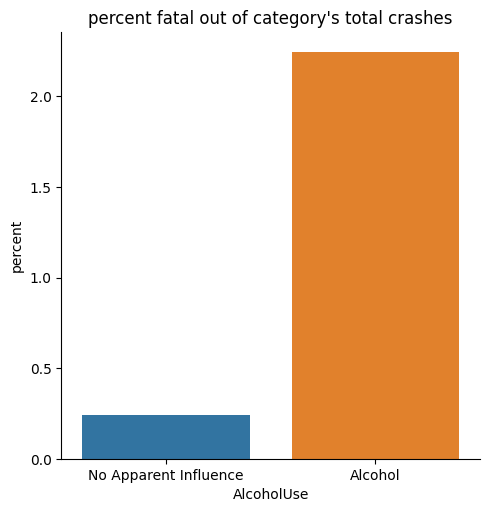

In [124]:
sns.catplot(data=FaAlcoholUsePercent, kind='bar', x='AlcoholUse', y='percent', hue='AlcoholUse')
plt.title("percent fatal out of category's total crashes")
plt.show()

#### FaCollison

In [125]:

#Trying to add line break to ANGLE... line
# FaCollisionmanner['Collisionmanner'] = FaCollisionmanner['Collisionmanner'].replace(
#     {'ANGLE(Front To Side)(Other Than Left Turn)': 'AGLE(Front To Side)\n(Other Than Left Turn)'}
# )
# FaCollisionmanner


FaCollisionCount = FaCollisionmanner.groupby('Collisionmanner').sum('Totalfatalities').sort_values('Totalfatalities', ascending=False).head(10).drop(index='10')

FaCollisionCount

,Totalfatalities
Collisionmanner,
Other,71.0
Single Vehicle,32.0
Left Turn,25.0
ANGLE (Front To Side)(Other Than Left Turn),11.0
Angle - Other Than Left Turn 2,7.0
Rear End,6.0
Head On,5.0
Sideswipe Same Direction,2.0
Unknown,2.0


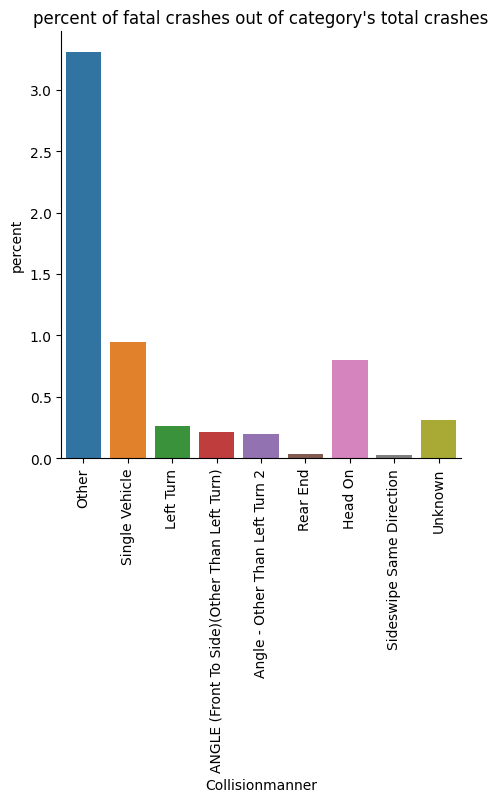

In [126]:
sns.catplot(data=FaCollisionmannerPercent.query('percent != 0.0'), kind='bar', x='Collisionmanner', y='percent', hue='Collisionmanner')

plt.title("percent of fatal crashes out of category's total crashes")
plt.xticks(rotation=90)
plt.show()

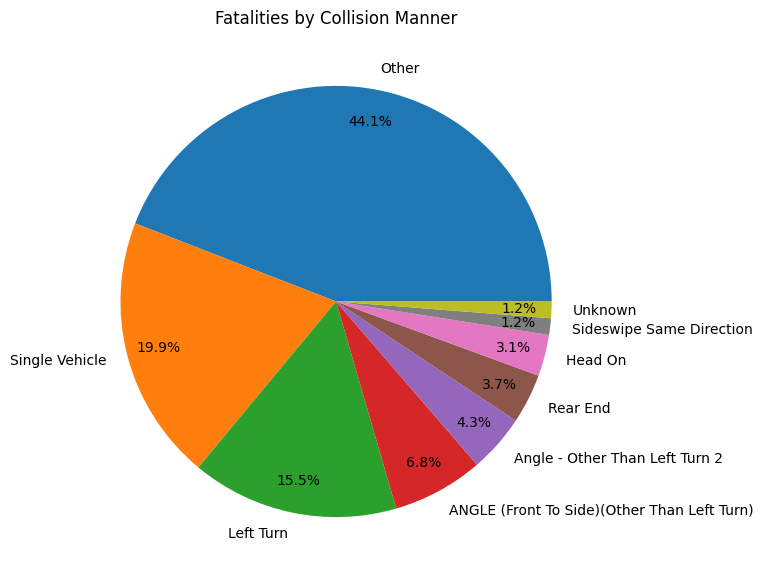

In [127]:
FaCollisionCount['Totalfatalities'].plot.pie(
    autopct='%1.1f%%', 
    startangle=0, 
    figsize=(7, 7), 
    title="Fatalities by Collision Manner",
    pctdistance=0.85,
    ylabel=''
)

plt.show()

#### FaLight

In [128]:
crash['Lightcondition'].value_counts()

Lightcondition
Daylight                 36201
Dark Lighted             11903
Dusk                      1618
Dawn                       463
Unknown 51                 417
Dark Not Lighted           385
Dark Unknown Lighting      259
51                          57
Name: count, dtype: int64

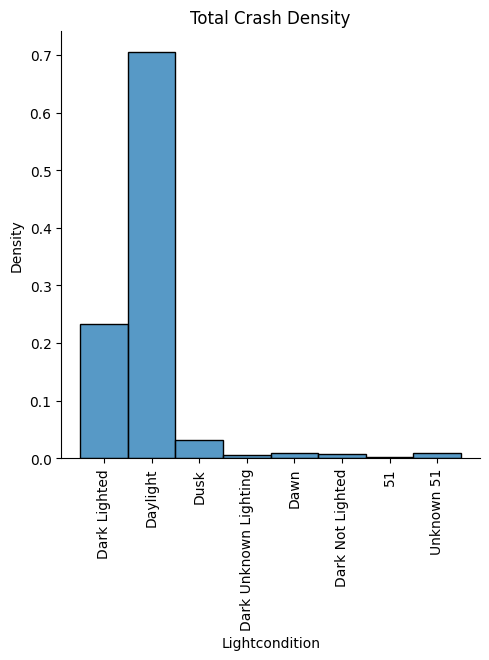

In [129]:
# sns.displot(crash[crash['Totalfatalities'] != 0.0]['Lightcondition'], x='Lightcondition')
sns.displot(crash, x='Lightcondition', stat='density')

plt.title('Total Crash Density')
plt.xticks(rotation=90)
plt.show()

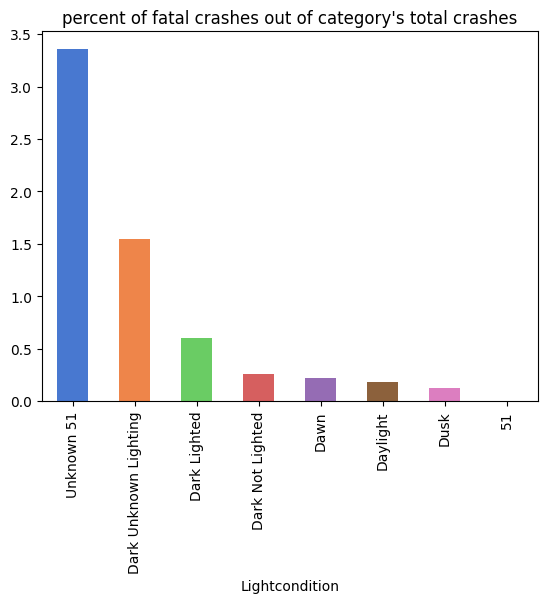

In [130]:
palette = sns.color_palette('muted', n_colors=len(FaLightPercent))
FaLightPercent.sort_values('percent', ascending=False)['percent'].plot(kind='bar', color=palette)

plt.title("percent of fatal crashes out of category's total crashes")
plt.show()



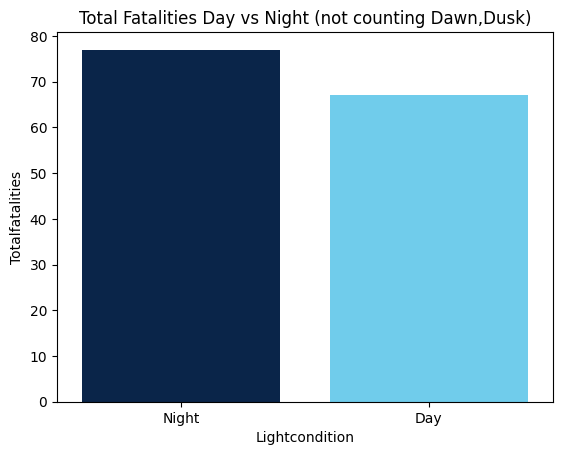

In [131]:
sns.barplot(data=FaDayNight.loc[['Night', 'Day']], x='Lightcondition', y='Totalfatalities', palette={'Day':'#5bd7ff','Night':'#002453'}, hue='Lightcondition')

plt.title("Total Fatalities Day vs Night (not counting Dawn,Dusk)")
plt.show()

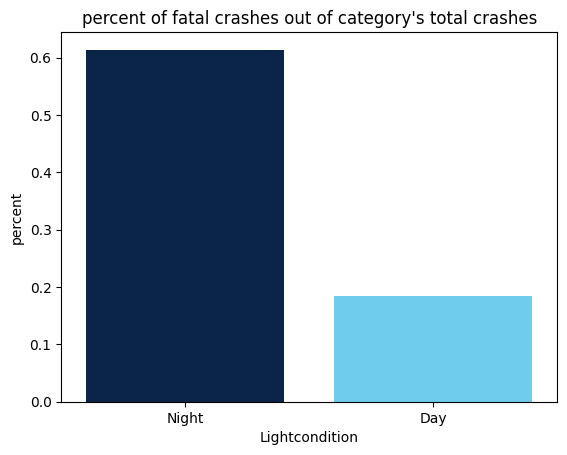

In [132]:
sns.barplot(data=FaDayNight.loc[['Night', 'Day']], x='Lightcondition', y='percent', palette={'Day':'#5bd7ff','Night':'#002453'}, hue='Lightcondition')

plt.title("percent of fatal crashes out of category's total crashes")
plt.show()


## Q3. Within Tempe, Has the ratio of car crashes in relation to population changed between 2012 and 2023? <a id='Q3'></a>

### Get <a id="Q3G"></a>

In [133]:
#this dataset was retrieved from Neilsberg.com which linked census.gov as their source, on census.gov 
#I then looked at the specific "Tempe, Arizona" row in the Arizona incorporated 2000-2010 dataset and 
#the 2020-2023 dataset to verify the numbers matched, an odd discrepencacy of about 1-10 people 
#between the two sites, but generally the same numbers.
population = pd.read_csv('population.csv')
crash = pd.read_csv('1.08_Crash_Data_Report_(detail).csv')
population

,Year,Population,Year on Year Change,Change in Percent
0,2000,"158,734",-,-
1,2001,"160,007","1,273",0.80%
2,2002,"161,549","1,542",0.96%
3,2003,"162,521",972,0.60%
4,2004,"165,575","3,054",1.88%
5,2005,"167,361","1,786",1.08%
6,2006,"170,225","2,864",1.71%
7,2007,"173,338","3,113",1.83%
8,2008,"176,546","3,208",1.85%
9,2009,"179,152","2,606",1.48%


### Clean <a id="Q3C"></a>

In [134]:
crash.drop(48830, inplace=True)
#verify that NaN row has been dropped
crash.isna().sum()['Incidentid']

np.int64(0)

In [135]:
#remove year 2024
crash.query('Year != 2024', inplace=True)
crash['Year'].value_counts()

Year
2019.0    5366
2018.0    5049
2017.0    4896
2016.0    4768
2015.0    4612
2023.0    4544
2014.0    4372
2013.0    4316
2012.0    4258
2022.0    3745
2021.0    2805
2020.0    2280
Name: count, dtype: int64

In [136]:
#remove years 2000-2011 
population.query('Year >= 2012 and Year <= 2023', inplace=True)
population

,Year,Population,Year on Year Change,Change in Percent
12,2012,"168,545","4,072",2.48%
13,2013,"170,742","2,197",1.30%
14,2014,"175,640","4,898",2.87%
15,2015,"179,122","3,482",1.98%
16,2016,"184,887","5,765",3.22%
17,2017,"185,560",673,0.36%
18,2018,"191,537","5,977",3.22%
19,2019,"195,656","4,119",2.15%
20,2020,"185,328","-10,328",-5.28%
21,2021,"184,690",-638,-0.34%


### Prepare <a id="Q3P"></a>

In [137]:
YearCount = crash['Year'].value_counts().reset_index().sort_values('Year', ascending=True)
YearCount

,Year,count
8,2012.0,4258
7,2013.0,4316
6,2014.0,4372
4,2015.0,4612
3,2016.0,4768
2,2017.0,4896
1,2018.0,5049
0,2019.0,5366
11,2020.0,2280
10,2021.0,2805


In [138]:
population['crashes'] = YearCount['count'].values
population

,Year,Population,Year on Year Change,Change in Percent,crashes
12,2012,"168,545","4,072",2.48%,4258
13,2013,"170,742","2,197",1.30%,4316
14,2014,"175,640","4,898",2.87%,4372
15,2015,"179,122","3,482",1.98%,4612
16,2016,"184,887","5,765",3.22%,4768
17,2017,"185,560",673,0.36%,4896
18,2018,"191,537","5,977",3.22%,5049
19,2019,"195,656","4,119",2.15%,5366
20,2020,"185,328","-10,328",-5.28%,2280
21,2021,"184,690",-638,-0.34%,2805


In [139]:
population.rename(columns={'Year on Year Change':'YearlyChange','Change in Percent':'PopPercentChange'}, inplace=True)

In [140]:
population['Population'] = population.Population.str.replace(',','')

In [141]:
population.head(2)

,Year,Population,YearlyChange,PopPercentChange,crashes
12,2012,168545,"4,072",2.48%,4258
13,2013,170742,"2,197",1.30%,4316


In [142]:
population['Population'] = population['Population'].astype(int)

In [143]:
population['CrashToPopPercent'] = (population['crashes'] / population['Population']) * 100
population

,Year,Population,YearlyChange,PopPercentChange,crashes,CrashToPopPercent
12,2012,168545,"4,072",2.48%,4258,2.526328
13,2013,170742,"2,197",1.30%,4316,2.527790
14,2014,175640,"4,898",2.87%,4372,2.489182
15,2015,179122,"3,482",1.98%,4612,2.574781
16,2016,184887,"5,765",3.22%,4768,2.578873
17,2017,185560,673,0.36%,4896,2.638500
18,2018,191537,"5,977",3.22%,5049,2.636044
19,2019,195656,"4,119",2.15%,5366,2.742569
20,2020,185328,"-10,328",-5.28%,2280,1.230251
21,2021,184690,-638,-0.34%,2805,1.518761


### Analyze <a id="Q3A"></a>

In [144]:
population

,Year,Population,YearlyChange,PopPercentChange,crashes,CrashToPopPercent
12,2012,168545,"4,072",2.48%,4258,2.526328
13,2013,170742,"2,197",1.30%,4316,2.527790
14,2014,175640,"4,898",2.87%,4372,2.489182
15,2015,179122,"3,482",1.98%,4612,2.574781
16,2016,184887,"5,765",3.22%,4768,2.578873
17,2017,185560,673,0.36%,4896,2.638500
18,2018,191537,"5,977",3.22%,5049,2.636044
19,2019,195656,"4,119",2.15%,5366,2.742569
20,2020,185328,"-10,328",-5.28%,2280,1.230251
21,2021,184690,-638,-0.34%,2805,1.518761


### Vizualize <a id="Q3V"></a>

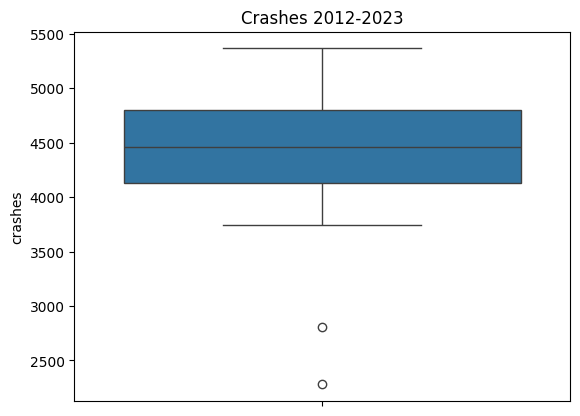

In [145]:
sns.boxplot(data=population, y='crashes')

plt.title('Crashes 2012-2023')
plt.show()

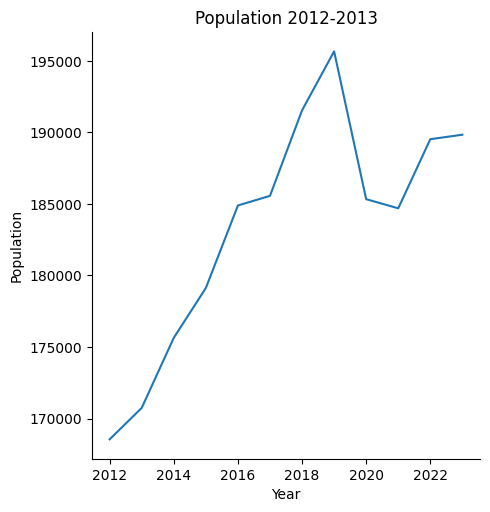

In [146]:
sns.relplot(data=population, kind='line', x='Year', y='Population') 

plt.title('Population 2012-2013')
plt.show()

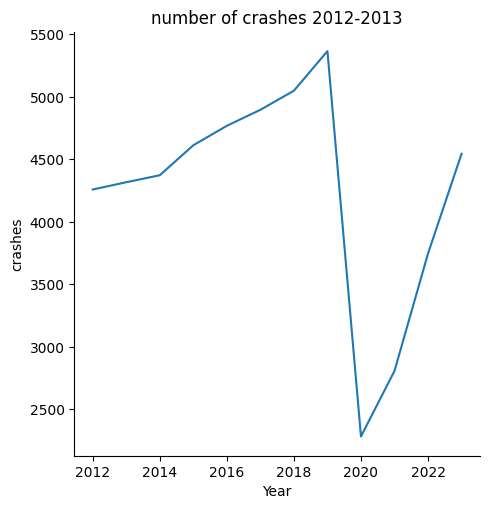

In [147]:
sns.relplot(data=population, kind='line', x='Year', y='crashes')

plt.title('number of crashes 2012-2013')
plt.show()

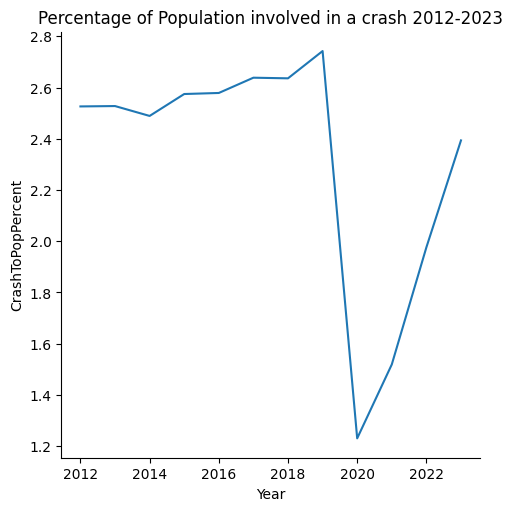

In [148]:
sns.relplot(data=population, kind='line', x='Year', y='CrashToPopPercent') 

plt.title('Percentage of Population involved in a crash 2012-2023')
plt.show()

## Questions and Insights <a id='QI'></a>

### **Q1. Do men or women cause the most car crashes?**
To do this, I will look at which gender is involved in the most amount of crashes and who is usually at fault.


Within Tempe, between 2012 and 2023:  
**52,975 Males** were involved in a car crash.  
**38,951 Females** were involved in a car crash.  

By separating each incident into individual drivers, I was able to count the number of female drivers that were in a crash due to some sort of traffic violation on their part, and the number of male drivers that were in a crash due to some sort of traffic violation on their part.

The results show that:  
**25,818 Males** were involved in a car accident due to some sort of traffic violation on their part.  
**17,881 Females** were involved in a car accident due to some sort of traffic violation on their part.

---

### **Q2. What factors play the largest role in whether a car crash is Fatal or not?**


To figure this out, I did an initial view of some of the columns that may have played a role in the severity of the crash. For each category of the categorical variable, I looked at how many crashes were recorded, how many fatalities occurred, and the ratio of fatalities to total records to determine which factors were primary and whether to choose them for further analysis.

**Alcohol**
- **2,586** people were involved in a car crash because a driver was under the influence of alcohol:  
- **58 fatalities** occurred from those crashes, which means
- **2.2%** of crashes with alcohol influence were fatal, whereas
- **0.2%** of crashes with no apparent alcohol influence were fatal.

**Collision manner** 
- **Single-vehicle crashes** accounted for the highest portion of fatalities based on specified collision manner, with:
*(specified collision manner) refers to collision manner that is not unspecified, such as other or unknown
  - **32 fatalities** out of
  - **3,387 total single-vehicle crashes**,  
    making it the specified collision manner with the highest fatality-to-total-crash ratio, with
  - **0.9%** of total single-vehicle crashes resulting in a fatality.

- **Head-on crashes** had the second-highest fatality-to-total-crash ratio, with:  
  - **0.8%** of total head-on crashes resulting in a fatality.

**Light condition** 
- **77 fatalities** occurred during dark conditions, out of
- **12,547 total crashes in dark conditions**. which means, 
- **0.6%** of total dark crashes resulted in a fatality, compared to
- **0.2%** of total day crashes resulting in a fatality.



---

### **Q3. Within Tempe, has the ratio of car crashes in relation to population changed between 2012 and 2023?**

in 2012 Tempe had
- **168,545** population
- **4,258** crashes
- **2.5%** crash to population ratio

in 2023 Tempe had
- **189,834** population
- **4,544** crashes
- **2.4%** crash to population ratio

That means a change of 
- **+21,289** people
- **+286** crashes
- **-0.1%** crash to population ratio

That means that between the two years although total crashes went up, when you take into account the number of crashes in relation to the increase in popuolation, the ratio went down. 

**additional insights:**

between 2012 and 2023, 2019 had the maximum population, the maximum number of crashes, and the maximum crash to population ratio

logically when there are more people it makes sense that more crashes would occurr as every new person is an additional potential crash, however this 0.2% **ratio** increment from 2012 could highlight that maybe the population reached a number where external factors began to cause car crashes such as an increase in city construction for example.


from 2019 to 2020, 
2020 brought a significant change of
- **-10,328** people
- **-3,086** crashes
- **-1.5%** crash to population ratio

My hypothesis is that this sudden change was due to the COVID-19 pandemic that occured that year. 
which likely kept many people at home and off the streets, and also may of driven many ASU Tempe students back home explaining the population change.
Although population was nowhere near the minimum that year, 2020 marks an all time low for car crashes, and consequently led to an all time low crash to population ratio, that was 45% lower than the previous year.






## Sources <a id="S"></a>

- https://data.tempe.gov/datasets/tempegov::1-08-crash-data-report-detail/about

  Main source from Tempe open data
- https://github.com/DS4PS/Data-Science-Class/tree/master/DATA

  This is the original deprecated github repo i found containing an old version of this data, though it is missing 4 columns as compared to the other source, this repo does provide an additional metadata file describing 31 out of the 35 columns in the other dataset. 


- https://www.neilsberg.com/insights/tempe-az-population-by-year/#bf60c745-4dd0-11ef-a154-3860777c1fe6

  main population source for Tempe between 2000-2023, following sources are cited by this main source and where used to verify accuracy
    - https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html 
      under incorporated places, click Arizona
    - https://www.census.gov/data/tables/time-series/demo/popest/2020s-total-cities-and-towns.html
      under incorporated places, click Arizona